In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Load the Iris dataset

iris = load_iris()

In [ ]:
# Create a DataFrame to better visualize the dataset

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
# Display basic information about the dataset

print("Number of Features:", iris_df.shape[1])
print("Number of Samples:", iris_df.shape[0])
print("\nAttribute Names (Features):")
print(iris_df.columns.tolist())
print("\nClasses (Target Names):")
print(iris.target_names)

Number of Features: 4
Number of Samples: 150

Attribute Names (Features):
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Classes (Target Names):
['setosa' 'versicolor' 'virginica']


In [ ]:
# print(iris_df)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris

In [ ]:
# Load Iris dataset

iris = load_iris()
iris_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['species'])

In [ ]:
# Question 1: Descriptive Statistics

mean_sepal_length = iris_data['sepal length (cm)'].mean()
median_sepal_length = iris_data['sepal length (cm)'].median()
std_sepal_length = iris_data['sepal length (cm)'].std()

print(f'Mean = {mean_sepal_length}')
print(f'Median = {median_sepal_length}')
print(f'Std = {std_sepal_length}')

Mean = 5.843333333333334
Median = 5.8
Std = 0.828066127977863


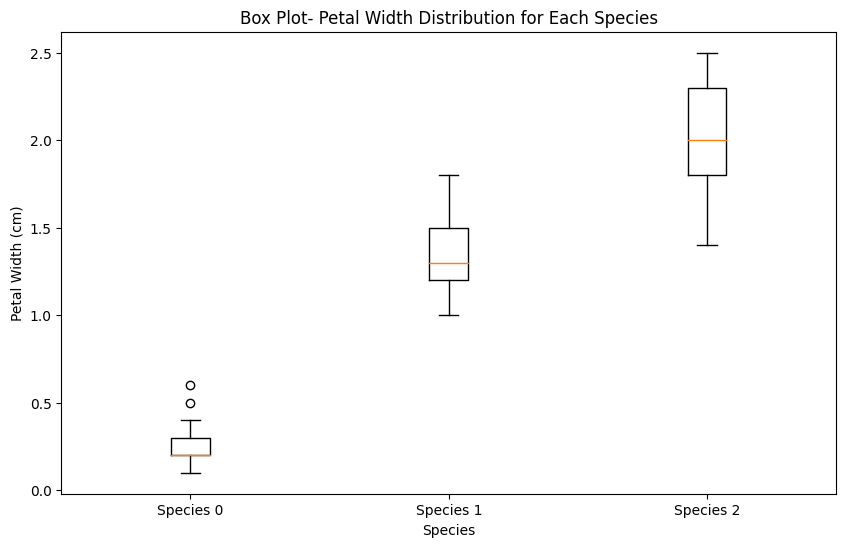

In [ ]:
 # Question 2: Data Visualization

plt.figure(figsize=(10, 6))

for species in iris_data['species'].unique():
  species_data = iris_data[iris_data['species'] == species]
  plt.boxplot(species_data['petal width (cm)'], positions=[species], labels=[f'Species {int(species)}'])

plt.title('Box Plot- Petal Width Distribution for Each Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

In [ ]:
# Question 3: Correlation Analysis

pearson_corr, _ = pearsonr(iris_data['sepal length (cm)'], iris_data['petal length (cm)'])

print(pearson_corr)
print(_)

0.8717537758865831
1.0386674194498827e-47


In [ ]:
# Question 4: Data Preprocessing

scaler = MinMaxScaler()

iris_data['sepal width (normalized)'] = scaler.fit_transform(iris_data[['sepal width (cm)']])

print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  sepal width (

In [ ]:
# Question 5: Hypothesis Testing

setosa_sepal_length = iris_data[iris_data['species'] == 0]['sepal length (cm)']
versicolor_sepal_length = iris_data[iris_data['species'] == 1]['sepal length (cm)']

t_stat, p_value =  ttest_ind(setosa_sepal_length, versicolor_sepal_length)

print(setosa_sepal_length)
print(versicolor_sepal_length)

print(t_stat)
print(p_value)

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length (cm), dtype: float64
50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7


In [ ]:
# Question 6: Decision Trees

X_train, X_test, y_train, y_test = train_test_split(iris_data.drop('species', axis=1), iris_data['species'], test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(criterion='gini')
dt_classifier.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))

print(X_train)
print(X_test)
print(y_train)
print(y_test)

print(dt_classifier)

print(dt_accuracy)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
22                 4.6               3.6                1.0               0.2   
15                 5.7               4.4                1.5               0.4   
65                 6.7               3.1                4.4               1.4   
11                 4.8               3.4                1.6               0.2   
42                 4.4               3.2                1.3               0.2   
..                 ...               ...                ...               ...   
71                 6.1               2.8                4.0               1.3   
106                4.9               2.5                4.5               1.7   
14                 5.8               4.0                1.2               0.2   
92                 5.8               2.6                4.0               1.2   
102                7.1               3.0                5.9               2.1   

     sepal width (normalize

In [ ]:
# Question 7: Support Vector Machines (SVM)

svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))

print(svm_classifier)
print(svm_accuracy)

SVC()
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


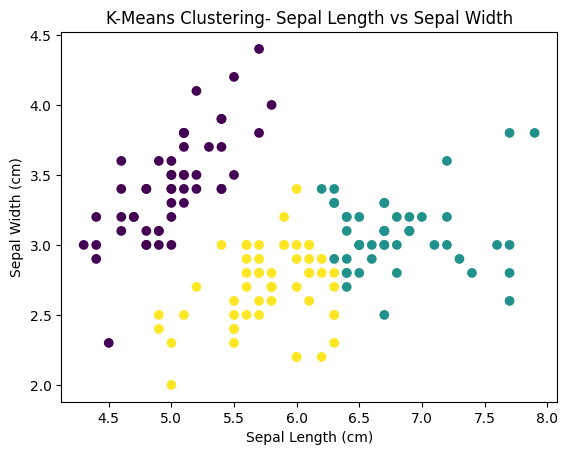

In [ ]:
# Question 8: K-Means Clustering

kmeans = KMeans(n_clusters=3)
iris_data['cluster'] = kmeans.fit_predict(iris_data[['sepal length (cm)', 'sepal width (cm)']])
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris_data['cluster'], cmap='viridis')
plt.title('K-Means Clustering- Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [ ]:
# Question 9: Principal Component Analysis (PCA)

pca = PCA()
iris_pca = pca.fit_transform(iris_data.drop(['species', 'cluster'], axis=1))
explained_variance_ratio = pca.explained_variance_ratio_
eigen_vectors = pca.components_

print(iris_pca)
print(explained_variance_ratio)
print(eigen_vectors)

[[-2.68918027e+00  3.28732847e-01 -3.97882672e-02 -3.18512201e-03
   2.16742788e-16]
 [-2.71143577e+00 -2.13281552e-01 -2.14186448e-01 -9.65293054e-02
   6.10477199e-16]
 [-2.88918918e+00 -1.52442775e-01  2.19658211e-02 -1.98552042e-02
   8.68902877e-17]
 [-2.74404624e+00 -3.27826326e-01  4.56073103e-02  7.68470658e-02
   4.30068463e-17]
 [-2.73524596e+00  3.51574357e-01  8.34510408e-02  5.93000933e-02
   2.00207083e-16]
 [-2.29238438e+00  7.91630945e-01  1.48739624e-01  1.94727310e-02
   8.97852915e-17]
 [-2.82381079e+00 -6.62040072e-02  2.68851721e-01  4.55690908e-02
   1.31063056e-16]
 [-2.62965938e+00  1.68505052e-01 -2.64731252e-02  4.52208186e-02
   1.41057141e-16]
 [-2.88187058e+00 -6.02814646e-01  4.12585525e-02  2.87699590e-02
   1.78784465e-16]
 [-2.67160029e+00 -1.39076774e-01 -1.96929832e-01  5.94998775e-02
   4.93724597e-17]
 [-2.51527252e+00  6.64836430e-01 -9.85535607e-02  1.35945715e-02
   6.14634980e-17]
 [-2.61620417e+00  3.11187680e-02  1.10081325e-01  1.56111975e-01

In [ ]:
# Question 10: Model Evaluation

logreg_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()
logreg_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
logreg_accuracy  = accuracy_score(y_test, logreg_classifier.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn_classifier.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f'Mean Sepal Length: {mean_sepal_length}')
print(f'Median Sepal Length: {median_sepal_length}')
print(f'Standard Deviation Sepal Length: {std_sepal_length}')
print(f'Pearson Correlation Coefficient: {pearson_corr}')
print(f'Petal Width Min-Max Scaled Values:\n{iris_data["sepal width (normalized)"]}')
print(f'T-Test p-value: {p_value}')
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'SVM Classifier Accuracy: {svm_accuracy}')
print(f'Principal Components Explained Variance Ratio: {explained_variance_ratio}')
print(f'Eigen Vectors:\n{eigen_vectors}')
print(f'Logistic Regression Accuracy: {logreg_accuracy}')
print(f'KNN Classifier Accuracy: {knn_accuracy}')

Mean Sepal Length: 5.843333333333334
Median Sepal Length: 5.8
Standard Deviation Sepal Length: 0.828066127977863
Pearson Correlation Coefficient: 0.8717537758865831
Petal Width Min-Max Scaled Values:
0      0.625000
1      0.416667
2      0.500000
3      0.458333
4      0.666667
         ...   
145    0.416667
146    0.208333
147    0.416667
148    0.583333
149    0.416667
Name: sepal width (normalized), Length: 150, dtype: float64
T-Test p-value: 8.985235037487079e-18
Decision Tree Accuracy: 1.0
SVM Classifier Accuracy: 1.0
Principal Components Explained Variance Ratio: [9.19144136e-01 5.76948192e-02 1.79092623e-02 5.25178240e-03
 5.11946227e-33]
Eigen Vectors:
[[ 3.60834168e-01 -8.50560144e-02  8.56220425e-01  3.58042968e-01
  -3.54400060e-02]
 [ 6.11152638e-01  7.15371331e-01 -1.51557565e-01 -5.40376063e-02
   2.98071388e-01]
 [-6.31140513e-01  5.12309879e-01  1.03263473e-01  5.31949883e-01
   2.13462450e-01]
 [-3.12974133e-01  2.65742218e-01  4.82963294e-01 -7.65450516e-01
   1.107

In [ ]:
# print(iris_data)